## An example how to calculate sdg 11.2 indicator for Friedrichshain (Berlin)

In [1]:
import os
import sys
project_path = os.path.abspath('../')
sys.path.append(project_path)
import geopandas as gpd
from matplotlib import pyplot as plt
from PtAC import accessibility as accessibility

Load stops and population data and generate boundary from population data.
The boundary is necessary to download the network afterwards.

In [2]:
stops = gpd.read_file(project_path + "/data/pt_example.gpkg")
stops_high_capacity = gpd.read_file(project_path + "/data/pt_example_high_capacity.gpkg")
stops_low_capacity = gpd.read_file(project_path + "/data/pt_example_low_capacity.gpkg")

population_points = gpd.read_file(project_path + "/data/population_example.gpkg")
boundary_gdf = gpd.GeoDataFrame(index=[0], crs='epsg:4326', geometry=[population_points.unary_union.convex_hull])

Plot population and pt stops

<AxesSubplot:>

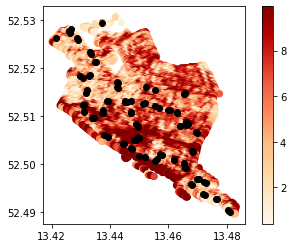

In [3]:
ax = population_points.plot(column= "pop", cmap='OrRd', legend=True)
stops_low_capacity.plot(color="black", ax=ax)

<AxesSubplot:>

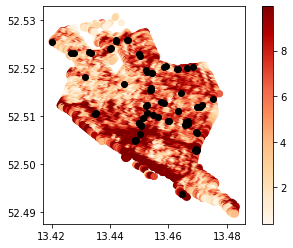

In [4]:
ax = population_points.plot(column= "pop", cmap='OrRd', legend=True)
stops_high_capacity.plot(color="black", ax=ax)

Calculate sum of population in the focus area

In [5]:
population_sum = population_points["pop"].sum()

print(f"Overall sum of population is: {population_sum}")

Overall sum of population is: 88270.7075406313


Now calculate the accessibilities from population point data to stations

In [6]:
accessibility_output_high = accessibility.distance_to_closest(start_geometries=population_points,
                                  destination_geometries=stops_high_capacity, transport_system="high-capacity",
                                  boundary_geometries=boundary_gdf,
                                  epsg=25833,
                                  network_exists=True,
                                  verbose=5)

Starting UrMoAC to calculate accessibilities

accessibility to public transport stops within 1000 m calculated in 13 seconds


In [7]:
accessibility_output_low = accessibility.distance_to_closest(start_geometries=population_points,
                                  destination_geometries=stops_low_capacity, transport_system="low-capacity",
                                  boundary_geometries=boundary_gdf,
                                  epsg=25833,
                                  network_exists=True,
                                  verbose=5)

Starting UrMoAC to calculate accessibilities

accessibility to public transport stops within 500 m calculated in 14 seconds
there is no such transport system


In [8]:
accessibility_output = accessibility.distance_to_closest(start_geometries=population_points,
                                                         destination_geometries=stops,
                                                         transport_system=None,
                                                         maximum_distance=500,
                                                         boundary_geometries=boundary_gdf,
                                                         epsg=25833,
                                                         network_exists=True,
                                                         verbose=5)


Starting UrMoAC to calculate accessibilities

accessibility to public transport stops within 500 m calculated in 13 seconds


Calculate sum of population with access to pt within 500 meters

In [9]:
result = accessibility.calculate_sdg(population_points, accessibility_output, epsg=25833)
result

Calculating SDG 11.2. indicator ... 
SDG 11.2.1 indicator is calculated


0.948624134479945

Calculate the actual indicator and print the result

In [10]:
sdg = accessibility.calculate_sdg(population_points,
                            accessibility_output_high,
                            accessibility_output_low,
                            epsg=25833)
sdg
#print(f"{sdg}percent of the population have access to low and high-capacity public transit stops")

Calculating SDG 11.2. indicator ... 
SDG 11.2.1 indicator is calculated


0.9553637810609399

Plot result as a map

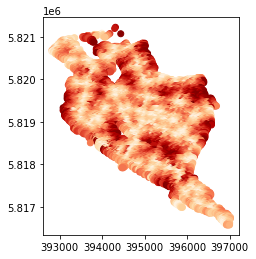

In [11]:
accessibility_output.plot(column='avg_distance', cmap='OrRd')
plt.show()
